In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [4]:
from sklearn.svm import SVC #importing the SVM
from sklearn.decomposition import PCA #importing PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)#2500 to 150
svc=SVC(kernel='rbf')

model=make_pipeline(pca,svc)#pipeline eka hadanawa

In [5]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [7]:
predicted_target=model.predict(test_data)

In [8]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)
print(acc)

0.7878787878787878


In [11]:
from sklearn.metrics import classification_report

print(classification_report(test_target,predicted_target,target_names=['Barack Obama', 'Donald Trump', 'George W Bush']))
#f1-score eka blanna ona hema label ekkama

               precision    recall  f1-score   support

 Barack Obama       1.00      0.56      0.71         9
 Donald Trump       0.77      0.91      0.83        11
George W Bush       0.73      0.85      0.79        13

     accuracy                           0.79        33
    macro avg       0.83      0.77      0.78        33
 weighted avg       0.82      0.79      0.78        33



<img src="6.jpg"/>

[[ 5  1  3]
 [ 0 10  1]
 [ 0  2 11]]


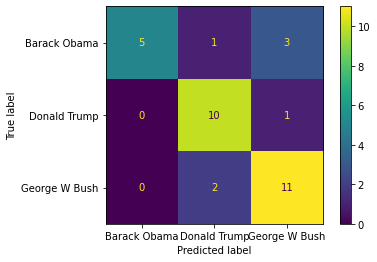

In [14]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(test_target,predicted_target)
print(matrix)
#pip install --user --upgrade scikit-learn
disp=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=['Barack Obama', 'Donald Trump', 'George W Bush'])
disp.plot()
#hriyata blanna bari unoth ekata features change  karanawa

In [15]:
import joblib

joblib.dump(model,'SVM-Face Recognition.sav')

['SVM-Face Recognition.sav']

In [16]:
np.max(train_data[1])

250